In [1]:
import numpy as np

In [2]:
import keras
from keras import layers

In [3]:
#Input image
input_img=keras.Input(shape=(28,28,1))

In [4]:
#Encoder
x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(input_img)
x=layers.MaxPool2D((2,2),padding="same")(x)
x=layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded= layers.MaxPooling2D((2, 2), padding='same')(x)

In [5]:
#Decoder
x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.UpSampling2D((2,2))(x)
decoded=layers.Conv2D(1,(3,3),activation="relu",padding="same")(x)

In [6]:
autoencoder=keras.Model(input_img,decoded)

In [7]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,121 (74.69 KB)

 Trainable params: 19,121 (74.69 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Preparo los datos de entrada
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
#Normalizo las imágenes
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [11]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

## Añado ruido a las imágenes

In [12]:
noise_factor=0.5
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

In [13]:
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [14]:
#Limito los valores solo a 0 - 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

-----

In [15]:
import matplotlib.pyplot as plt

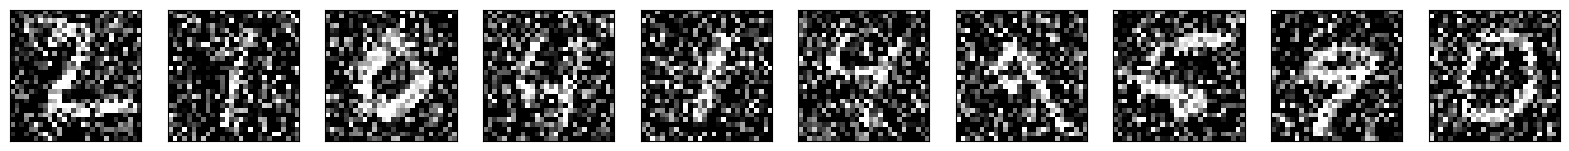

In [16]:
#Ploteo algunas imágenes
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax=plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
#Compile step para ajustar algunos config. del modelo antes de entrenar
autoencoder.compile(optimizer="adam",
                    loss="binary_crossentropy")

In [18]:
#Entrenando el autoencoder con 50 épocas
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test,x_test)
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.1421 - val_loss: 0.1807
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1195 - val_loss: 0.1107
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1047 - val_loss: 0.1133
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1054 - val_loss: 0.0942
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1092 - val_loss: 0.0973
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1032 - val_loss: 0.0979
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1036 - val_loss: 0.0944
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1053 - val_loss: 0.0899
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0949 - val_loss: 0.1018
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0971 - val_loss: 0.1001
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0940 - val_loss: 0.0904
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/st

----------------

In [19]:
import matplotlib.pyplot as plt

In [20]:
#Uso el autoencoder, le paso la data de 'test' y veo el performance en limpiar el ruido
imgs_pred=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


------

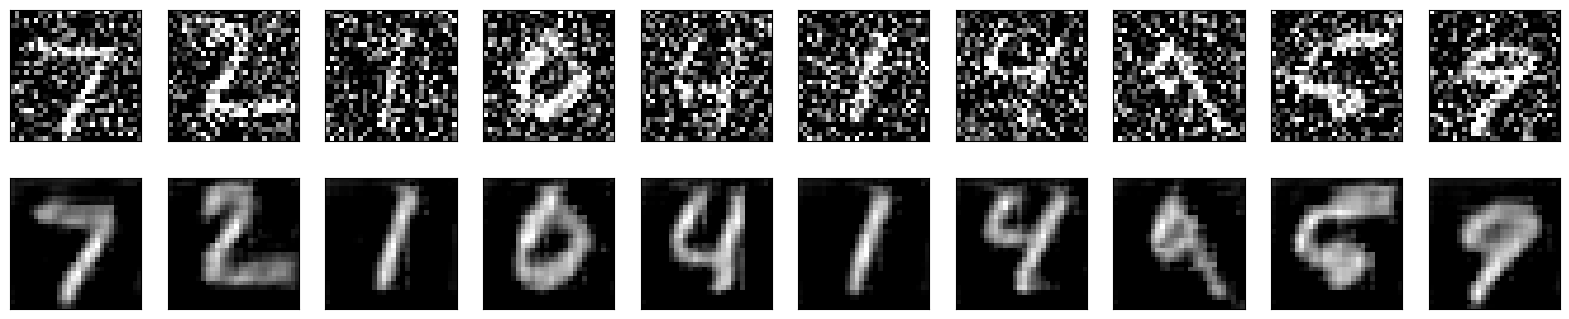

In [21]:
#Matplotlib
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #Display las imgs originales
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display las imgs reconstruidas
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(imgs_pred[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)